<a href="https://colab.research.google.com/github/Ishika-Pattnaik/Planetary-classifier/blob/main/ML_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Planetary Classifier Project

### Problem Statement
The task is to classify planets based on features like Atmospheric Density, Gravity, Water Content, etc., into specific classes (`Prediction`).  

We will train 2 different classification models and compare their performance. The 2 models chosen are Random Forest Classifier and Logistic Regression.


## Step 1: Loading the dataset

In [ ]:
import pandas as pd
df=pd.read_csv("/content/sample_data/cosmicclassifierTraining.csv")
df.head(10)

,Atmospheric Density,Surface Temperature,Gravity,Water Content,Mineral Abundance,Orbital Period,Proximity to Star,Magnetic Field Strength,Radiation Levels,Atmospheric Composition Index,Prediction
0,0.472806,NaN,-0.313872,-2.089299,-0.152201,-0.885649,0.900105,NaN,Category_6,0.692907,5.0
1,4.180154,-1.157515,2.430956,-1.595850,-3.188678,-0.609434,-0.199828,Category_9,Category_9,NaN,0.0
2,-0.129008,1.621592,-0.785741,2.081196,-1.413796,-0.095152,-3.502577,NaN,Category_8,-0.677182,4.0
3,-3.122000,-2.299818,1.072092,0.353524,-0.192529,2.917067,-1.972329,NaN,Category_11,0.109429,1.0
4,-1.459426,2.890268,0.148757,-0.804439,0.494875,0.044910,-0.438796,Category_6,Category_10,0.407941,9.0
5,0.749979,1.064353,2.510823,0.105772,1.203825,1.355501,NaN,Category_10,Category_9,0.551453,2.0
6,-2.971646,-0.648251,-0.915859,0.255504,-0.537165,-2.072251,1.355523,Category_8,Category_7,1.876232,1.0
7,1.981474,-1.347445,-0.483752,-3.365811,2.690204,1.199946,-1.907013,Category_12,Category_5,0.443053,NaN
8,-3.306354,-0.316716,-0.431264,0.389815,-1.961216,-1.510182,0.538593,Category_8,Category_7,0.934055,1.0
9,-1.188687,1.775882,2.666702,0.434578,0.205058,NaN,-1.545261,Category_10,Category_9,-1.973059,4.0


## Step 2: Preprocessing the dataset


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Handling missing numerical values
numerical_cols = [
    'Atmospheric Density', 'Surface Temperature', 'Gravity',
    'Water Content', 'Mineral Abundance', 'Orbital Period',
    'Proximity to Star', 'Atmospheric Composition Index'
]

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Handling missing categorical values
categorical_cols = ['Magnetic Field Strength', 'Radiation Levels']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)
#One-hot encoding categorical features
df = pd.get_dummies(df, columns=['Magnetic Field Strength', 'Radiation Levels'], drop_first=True)

# Removing rows where target (Prediction) is NaN
df = df[df['Prediction'].notna()]

# Splitting features and target
X = df.drop('Prediction', axis=1)
y = df['Prediction']

# Check unique classes (should not contain NaN)
print("Unique classes in target after cleaning:", y.unique())

# Train-test splitting (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Converting target to NumPy arrays
y_train = y_train.values
y_test = y_test.values

print("✅ Preprocessing completed. Data is now clean and ready for model training.")


/tmp/ipython-input-3090510211.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-3090510211.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

Unique classes in target after cleaning: [5. 0. 4. 1. 9. 2. 3. 6. 7. 8.]
✅ Preprocessing completed. Data is now clean and ready for model training.


## Preview of training and testing set

In [ ]:
print("First few elements of X_train:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First few elements of X_train:
 [[-1.57353525e-02  1.72048528e+00 -6.65601996e-01 -6.19951354e-01
   1.01407883e-03 -5.49788437e-02  1.53785380e+00  6.03541321e-01
  -3.87873183e-01 -3.36663954e-01 -2.86383452e-01 -2.35374486e-01
  -1.94620746e-01  6.84584153e+00 -1.10328454e-01 -6.13740070e-02
  -3.24727816e-02 -1.75307606e-02 -3.50776954e-02 -4.68462446e-03
  -7.38241975e-02 -1.22251050e-01 -1.86771842e-01 -2.48088250e-01
  -3.36300246e-01 -4.16019792e-01 -5.03508815e-01 -3.96551572e-01
  -3.36785138e-01 -2.51213140e-01 -1.72516780e-01 -1.10226520e-01
  -6.63957347e-02 -4.11417367e-02 -2.04238389e-02 -1.32511367e-02
  -4.68462446e-03 -3.38002278e-02 -4.68462446e-03 -6.53878912e-02
  -1.20669637e-01 -1.99071560e-01 -3.08929249e-01  2.49018300e+00
  -5.19080980e-01 -4.34906944e-01]
 [-4.65233039e-01  9.94452653e-01  9.55356775e-01  6.56682064e-01
  -5.09598015e-02 -7.85920048e-01 -1.60852201e-01 -1.17349965e+00
  -3.87873183e-01 -3.36663954e-01 -2.86383452e-01 -2.35374486e-01
  -1.9462

In [ ]:
print("First few elements of y_train:", y_train[:50])
print("Type of y_train:",type(y_train))

First few elements of y_train: [7. 4. 0. 8. 1. 2. 9. 2. 9. 8. 6. 3. 6. 1. 6. 7. 3. 1. 7. 9. 2. 4. 8. 1.
 9. 1. 5. 8. 1. 6. 9. 3. 8. 6. 9. 3. 4. 7. 9. 5. 1. 0. 6. 3. 3. 1. 5. 4.
 0. 9.]
Type of y_train: <class 'numpy.ndarray'>


## Step 3: Using Random Forest CLassifier

In [57]:
from sklearn.ensemble import RandomForestClassifier

# ---- Initializing Random Forest ----
rf = RandomForestClassifier(n_estimators=300, random_state=42)

# ---- Training the model ----
rf.fit(X_train, y_train)

print("✅ Random Forest training completed.")
y_pred= rf.predict(X_test)


✅ Random Forest training completed.


## Step 4: Reporting Accuracy, Precision, F1 Score and Recall

In [58]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
precision= precision_score(y_test, y_pred, average='weighted')
accuracy= accuracy_score(y_test, y_pred)
f1= f1_score(y_test, y_pred, average='weighted')
recall= recall_score(y_test, y_pred, average='weighted')
print(f"Accuracy= {accuracy: .4f}")
print(f"Precision= {precision: .4f}")
print(f"F1 Score= {f1: .4f}")
print(f"Recall= {recall: .4f}")

Accuracy=  0.8633
Precision=  0.8635
F1 Score=  0.8633
Recall=  0.8633


## Using Feature Importance

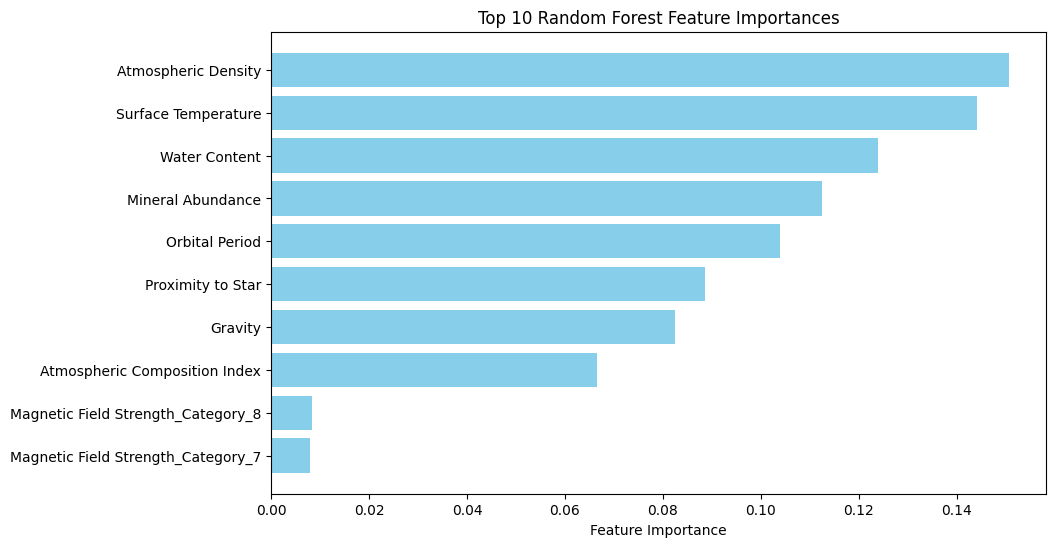

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Get feature importances and feature names
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame of features and their importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (descending) and pick top 10
top_features = feat_imp_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 10 Random Forest Feature Importances')
plt.gca().invert_yaxis()  # Show most important feature at top
plt.show()


##Using Logistic Regression

In [54]:
# importing the modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

#creating the model
lr=LogisticRegression(max_iter= 1000, random_state=42)

#fitting the model
lr.fit(X_train, y_train)

#Making predictions
y_pred_lr=lr.predict(X_test)

#Performance metrics
accuracy_lr= accuracy_score(y_test, y_pred)
precision_lr=precision_score(y_test, y_pred, average="weighted")
f1_lr=f1_score(y_test, y_pred, average="weighted")
recall_lr=recall_score(y_test, y_pred, average="weighted")
print(f"Accuracy= {accuracy_lr: .4f}")
print(f"Precision= {precision_lr: .4f}")
print(f"F1 Score= {f1_lr: .4f}")
print(f"Recall= {recall_lr: .4f}")


Accuracy=  0.8633
Precision=  0.8635
F1 Score=  0.8633
Recall=  0.8633


## Comparison between the models

In [56]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Random Forest", "Logistic Regression"],
    "Accuracy": [accuracy, accuracy_lr],
    "Precision": [precision, precision_lr],
    "Recall": [recall, recall_lr],
    "F1 Score": [f1, f1_lr]
})

results


,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.863337,0.863472,0.863337,0.863334
1,Logistic Regression,0.863337,0.863472,0.863337,0.863334


#**Conclusion:**  
- Both Random Forest and Logistic Regression performed equally well on this dataset (~86% accuracy).  
- Random Forest is slightly preferred due to its robustness and ability to handle non-linear patterns.  
- The top contributing features according to Random Forest are Atmospheric Density, Surface Temperature and water content.
- Naive Bayes was tested but not included here because it performed poorly (assumes feature independence).